In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import zipfile
import pathlib
#import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.17.0


In [3]:
data_url = r'dir_path'
data_dir = pathlib.Path(data_url).with_suffix("")

In [ ]:
with zipfile.ZipFile(data_url, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print(f"Extracted files to {data_dir}")

In [ ]:
image_dir = pathlib.Path(data_dir) /'archive (6)'/'train'
print(f"Looking for images in: {image_dir}")

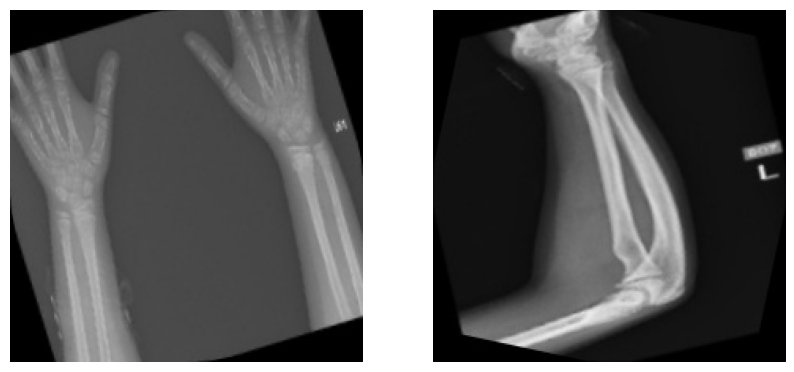

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import pathlib

# Define the paths to the directories containing the images
image_dir = pathlib.Path(data_dir) / 'archive (6)' / 'train' / 'fractured'
image_dir_1 = pathlib.Path(data_dir) / 'archive (6)' / 'train' / 'not fractured'

# Get a list of all images in the directories
image_files = list(image_dir.glob('*.jpg'))
image_files_1 = list(image_dir_1.glob('*.jpg'))

# Check if both directories contain any images
if len(image_files) > 0 and len(image_files_1) > 0:
    # Select the first image from each directory
    image_path = image_files[0]
    image_path_1 = image_files_1[0]
    
    # Open the images
    img = Image.open(image_path)
    img_1 = Image.open(image_path_1)
    
    # Displaying fractured and non fractured images
    plt.figure(figsize=(10, 5))  
    plt.subplot(1, 2, 1) 
    plt.imshow(img)
    plt.axis('off')  

    plt.subplot(1, 2, 2) 
    plt.imshow(img_1)
    plt.axis('off')  
    
    
    plt.show()

else:
    print(f"No images found in {image_dir} or {image_dir_1}")


In [9]:
image_count = len(list(image_dir.glob('*')))
print(f"Number of images: {image_count}")

Number of images: 4480


parameters for the image loader

In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
from pathlib import Path

image_dir = Path(r'dir_path')


Train_test_split 

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  image_dir, 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


Found 8863 files belonging to 2 classes.
Using 7091 files for training.


In [15]:
from pathlib import Path

data_dir = Path(r'dir_path')


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 2 classes.
Using 120 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['fractured', 'not fractured']


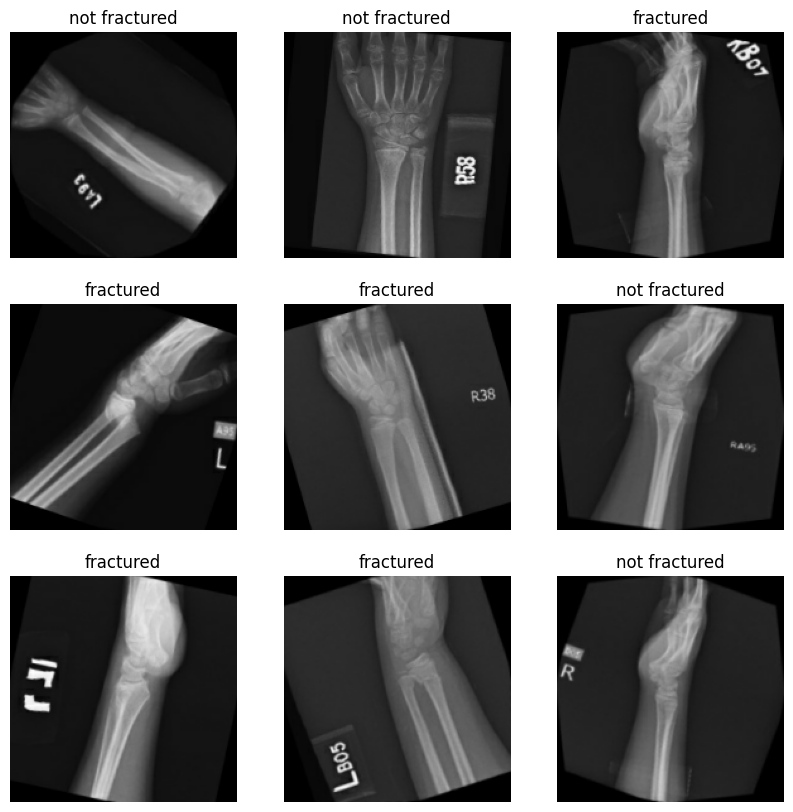

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9501178


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 72s 318ms/step - accuracy: 0.6348 - loss: 0.6237 - val_accuracy: 0.6333 - val_loss: 0.7584
Epoch 2/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step - accuracy: 0.8847 - loss: 0.2758 - val_accuracy: 0.6833 - val_loss: 1.2993
Epoch 3/3
222/222 ━━━━━━━━━━━━━━━━━━━━ 46s 208ms/step - accuracy: 0.9741 - loss: 0.0720 - val_accuracy: 0.7333 - val_loss: 1.3784
